# Task 1

### Import Library and Loading the Data

Step 1: Importing the necessary libraries needed.   

In [73]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [152]:
df= pd.read_csv('C:/Users/prade/Downloads/Task1_RegressionTask_CancerData.txt', delimiter="\t")

In [153]:
df

,index,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


Some descriptive analysis be done on the dataset

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               97 non-null     int64  
 1   logCancerVol        97 non-null     float64
 2   logCancerWeight     97 non-null     float64
 3   age                 97 non-null     int64  
 4   logBenighHP         97 non-null     float64
 5   svi                 97 non-null     int64  
 6   logCP               97 non-null     float64
 7   gleasonScore        97 non-null     int64  
 8   gleasonS45          97 non-null     int64  
 9   levelCancerAntigen  97 non-null     float64
 10  train               97 non-null     object 
dtypes: float64(5), int64(5), object(1)
memory usage: 8.5+ KB


In [155]:
df.describe()

,index,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,28.145456,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,1.000000,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,25.000000,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,49.000000,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,73.000000,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,97.000000,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


## Data Preprocessing

The first step of data preprocessing is to find any missing or null values

In [157]:
df.isnull().sum()

index                 0
logCancerVol          0
logCancerWeight       0
age                   0
logBenighHP           0
svi                   0
logCP                 0
gleasonScore          0
gleasonS45            0
levelCancerAntigen    0
train                 0
dtype: int64

From this, we can see that there are no missing or null values.

Now, inorder to do train the model, we have split the data into training and testing dataset. The 'T' values in the train column are taken as the training dataset and the 'F' values in the train column are taken as testing dataset.

In [158]:
train_set = df[df['train'] == 'T'].drop(['train'], axis = 1)
test_set = df[df['train'] == 'F'].drop(['train'], axis = 1)

In [159]:
train_set.head()

,index,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [160]:
train_set.shape

(67, 10)

In [161]:
test_set.head()

,index,logCancerVol,logCancerWeight,age,logBenighHP,svi,logCP,gleasonScore,gleasonS45,levelCancerAntigen
6,7,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
8,9,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319
9,10,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319
14,15,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5,1.398717
21,22,2.059239,3.501043,60,1.474763,0,1.348073,7,20,1.658228


In [162]:
test_set.shape

(30, 10)

### Feature Extraction

In [163]:
X_train = train_set[['logCancerVol', 'logCancerWeight', 'age', 'logBenighHP', 'svi', 'logCP', 'gleasonScore', 'gleasonS45']]
Y_train = train_set[['levelCancerAntigen']]

In [164]:
X_test = test_set[['logCancerVol', 'logCancerWeight', 'age', 'logBenighHP', 'svi', 'logCP', 'gleasonScore', 'gleasonS45']]
Y_test = test_set[['levelCancerAntigen']]

## Data Standardization

Since we have a numerical dataset that has different scale of measures on each column we need to Normalize and standardize these features. We have used StandardScalar from sklearn to standardize the features. 

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
scaler = StandardScaler()

X1 = normalize(X_train)
X = scaler.fit_transform(X1)
Y = np.array(Y_train)

In [166]:
Xtest = normalize(X_test)
Xt = scaler.fit_transform(Xtest)
Yt = np.array(Y_test)

## Building Regression Models

### Linear Regression

In [263]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X,Y)
y_pred_linear = linear_model.predict(Xt)
mse_linear = mean_squared_error(Yt, y_pred_linear)
print(f"Linear Mean Squared Error: {mse_linear}")

Linear Mean Squared Error: 0.5083573340577342


### Ridge Regression

In [225]:
ridge_model = Ridge()
ridge_model.fit(X,Y)
y_pred_ridge = ridge_model.predict(Xt)
mse_ridge = mean_squared_error(Yt, y_pred_ridge)
print(f"Ridge Mean Squared Error: {mse_ridge}")

Ridge Mean Squared Error: 0.4895765123680548


### Lasso Regression

In [168]:
from sklearn.metrics import mean_squared_error
lasso_model = Lasso()
lasso_model.fit(X,Y)
y_pred_lasso = lasso_model.predict(Xt)
mse_lasso = mean_squared_error(Yt, y_pred_lasso)
print(f"Lasso Mean Squared Error: {mse_lasso}")

Lasso Mean Squared Error: 1.0567332280603818


### Cross Validation

In [246]:
from sklearn.model_selection import KFold

start_alpha = 0.001
end_alpha = 3.0
alpha_interval = 0.001

alpha_values = list(np.arange(start_alpha, end_alpha + alpha_interval, alpha_interval))

ridge_mses = []
lasso_mses = []

kf = KFold(n_splits=10)

for alpha in alpha_values:
    ridge_mse = 0
    lasso_mse = 0
    for train_index, val_index in kf.split(X):
        X_sub_train, X_val = X[train_index], X[val_index]
        y_sub_train, y_val = Y[train_index], Y[val_index]

        # Ridge
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_sub_train, y_sub_train)
        ridge_pred = ridge.predict(X_val)
        ridge_mse += mean_squared_error(y_val, ridge_pred)

        # Lasso
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_sub_train, y_sub_train)
        lasso_pred = lasso.predict(X_val)
        lasso_mse += mean_squared_error(y_val, lasso_pred)

    # Calculate the average MSE over folds
    ridge_avg_mse = ridge_mse / kf.get_n_splits()
    lasso_avg_mse = lasso_mse / kf.get_n_splits()

    ridge_mses.append(ridge_avg_mse)
    lasso_mses.append(lasso_avg_mse)
        


Now we have to find the alpha value which has the minimum MSE value for the Ridge Regression model. First let us plot a graph to visualize it.

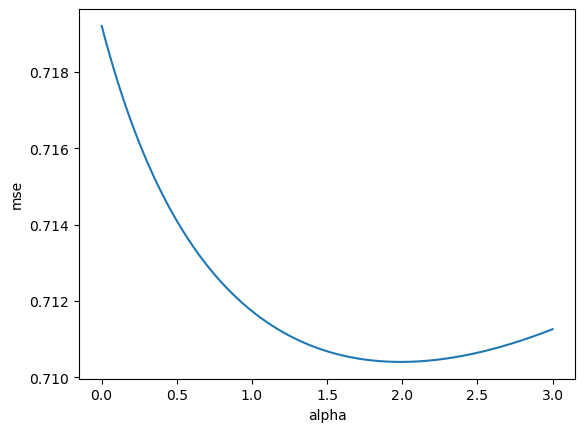

In [247]:
plt.plot(alpha_values, ridge_mses)
plt.xlabel('alpha')
plt.ylabel('mse')
plt.show()

Let us have a look at the optimal alpha value of the Ridge Regression

In [248]:
best_alpha_ridge = alpha_values[np.argmin(ridge_mses)]
print(f"Alpha value of Ridge: {best_alpha_ridge}")

Alpha value of Ridge: 1.9889999999999999


Now we have to find the alpha value which has the minimum MSE value for the Ridge Regression model. First let us plot a graph to visualize it.

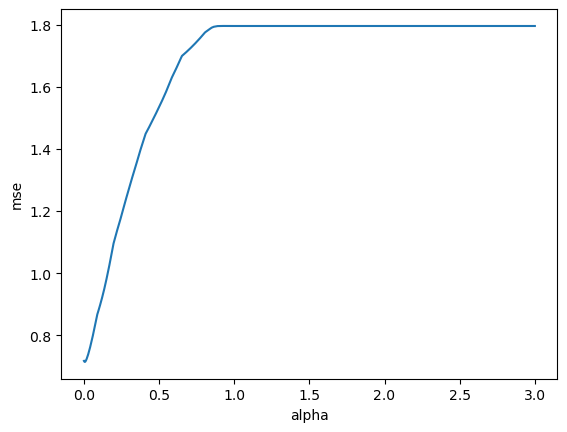

In [249]:
plt.plot(alpha_values, lasso_mses)
plt.xlabel('alpha')
plt.ylabel('mse')
plt.show()

Let us have a look at the optimal alpha value of the Lasso Regression

In [250]:
best_alpha_lasso = alpha_values[np.argmin(lasso_mses)]
print(f"Alpha value of Lasso: {best_alpha_lasso}")

Alpha value of Lasso: 0.007


Since we have the best alpha values, now we can include that as parameters for our regression models and find which is the best regression model that has the lowest value of MSE.

In [252]:
ridge_model = Ridge(alpha = 1.988)
ridge_model.fit(X,Y)
y_pred_ridge = ridge_model.predict(Xt)
mse_ridge = mean_squared_error(Yt, y_pred_ridge)
print(f"Ridge Mean Squared Error: {mse_ridge}")

Ridge Mean Squared Error: 0.4793801585799768


In [251]:
from sklearn.metrics import mean_squared_error
lasso_model = Lasso(alpha=0.007)
lasso_model.fit(X_train, Y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
print(f"Lasso Mean Squared Error: {mse_lasso}")

Lasso Mean Squared Error: 0.5106848638178022


Since we have gotten our best Mean Squared Values for each of our Regression models. Its time to fine which model is suitable for performing the inference to the clinical measures that are mostly influencing the cancer antigen. For that purpose we have created a bar graph.

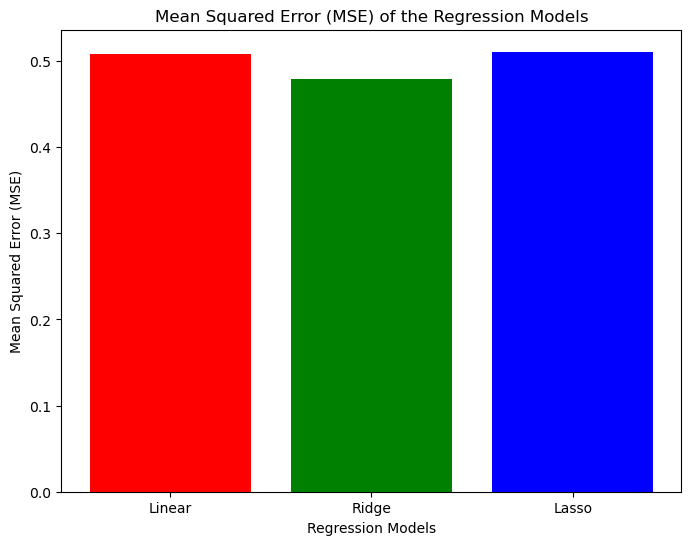

In [267]:
plt.figure(figsize=(8, 6))
plt.bar(['Linear', 'Ridge', 'Lasso'], [mse_linear, mse_ridge, mse_lasso], color=['red', 'green', 'blue'])
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) of the Regression Models')
plt.show()

From the bar graph, we can conclude that Ridge Regression is the suitable model to provide the inference. It has the lowest MSE compared to the other models.

Now, Inorder to find the features that greatly influence the dataset. We have to the coefficients of the features using the Ridge model. The higher the coefficients the greater the influence and imapct they make in the dataset. Let us have a look at how the coefficients are calculated.

In [254]:
for i in range(0, len(X_train.columns)):
    print('Coefficient for %s:%s\t%s' %
          (X_train.columns[i],
           '\t' if len(X_train.columns[i]) < 8 else '',
           ridge_model.coef_[0][i]))

Coefficient for logCancerVol:	0.5524452656962917
Coefficient for logCancerWeight:	0.3753558036166238
Coefficient for age:		-0.07981956428820025
Coefficient for logBenighHP:	0.24679674640069263
Coefficient for svi:		0.2746428230451138
Coefficient for logCP:		-0.13035375360622442
Coefficient for gleasonScore:	-0.1938997775794398
Coefficient for gleasonS45:	0.4302634166166712


From the result, we can say that the features logCancerVol, logCancerWeight, logBenignHP, svi, gleasonS45 are considered to greatly influence the prediction of the cancer antigen. Most importantly, logCancerVol and gleasonS45 has the highest influence compared to the other features. These features greatly help in the prediction of the cancer antigen.

# Task 2

## Importing the Libraries and Loading the Dataset

In [504]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPool2D, RandomFlip, RandomRotation
import matplotlib.pyplot as plt
import os
import shutil

In [727]:
image_directory = "C:/Users/prade/Downloads/train_data_small"

dog_folder = os.path.join(image_directory, 'Dog')
cat_folder = os.path.join(image_directory, 'Cat')
os.makedirs(dog_folder, exist_ok=True)
os.makedirs(cat_folder, exist_ok=True)

for filename in os.listdir(image_directory):
    if filename.startswith("dog."):
        shutil.move(os.path.join(image_directory, filename), os.path.join(dog_folder, filename))
    elif filename.startswith("cat."):
        shutil.move(os.path.join(image_directory, filename), os.path.join(cat_folder, filename))

In [729]:
image_directory = "C:/Users/prade/Downloads/test_data_small"

dog_folder = os.path.join(image_directory, 'Dog')
cat_folder = os.path.join(image_directory, 'Cat')
os.makedirs(dog_folder, exist_ok=True)
os.makedirs(cat_folder, exist_ok=True)

for filename in os.listdir(image_directory):
    if filename.startswith("dog."):
        shutil.move(os.path.join(image_directory, filename), os.path.join(dog_folder, filename))
    elif filename.startswith("cat."):
        shutil.move(os.path.join(image_directory, filename), os.path.join(cat_folder, filename))

In [788]:
train_path = 'C:/Users/prade/Downloads/train_data_small'
test_path = 'C:/Users/prade/Downloads/test_data_small'

## Image Preprocessing and Image Augmentation

To increase the diversity of data and prevent overfitting, we are applying random transformation such as rotation, it rotates the image clockwise to a certain extent and the next is the rescale, it rescales the image to a certain extent. The Horizontal flip and the verical flip is set to true, which means that the image are flipped vertically or horizontally. These are some of the Data Augmentation process that are done by using the keras 'ImageDataGenerator' class. We also use the ImageDataGenerator class from keras.preprocessing.image to load the images from the mentioned directories.

Inregards to data Preprocessing, we are resizing the images to a uniform size which is, 200 x 200 pixels.

In [789]:
datagen = ImageDataGenerator( rescale = 1.0/255,
                             rotation_range=10,
                             horizontal_flip=True,
                             vertical_flip=True,
                            validation_split = 0.2)

train_generator = datagen.flow_from_directory(train_path,
                                              batch_size=10,
                                              class_mode='binary',
                                              color_mode='rgb',
                                              shuffle=True,
                                              seed=123,
                                              target_size=(200, 200),
                                             subset='training')
validation_generator = datagen.flow_from_directory(train_path,
                                                   batch_size=10,
                                                   class_mode='binary',
                                                   color_mode='rgb',
                                                   shuffle=True,
                                                   seed=123,
                                                   target_size=(200, 200),
                                                  subset='validation')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_path,
                                                        batch_size=10,
                                                        class_mode='binary',
                                                        color_mode='rgb',
                                                        shuffle=False,
                                                        seed=123,
                                                        target_size=(200, 200))

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [790]:
class_names = test_generator.class_indices
print(class_names)

{'Cat': 0, 'Dog': 1}


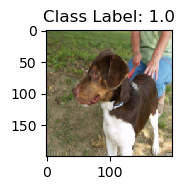

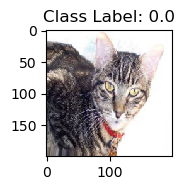

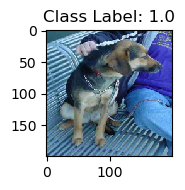

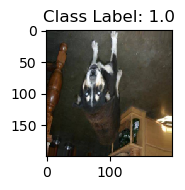

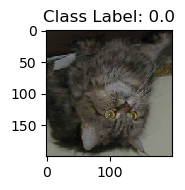

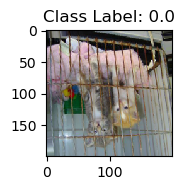

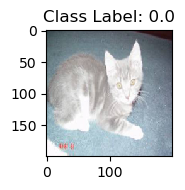

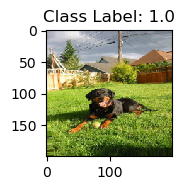

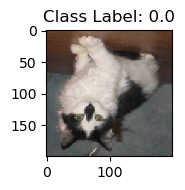

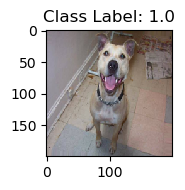

In [781]:
for i in range(10):
    batch = train_generator.next()
    images, labels = batch
    plt.figure(figsize=(2,2))
    plt.imshow(np.squeeze(images[0]), interpolation='nearest')
    plt.title(f"Class Label: {labels[0]}")
    plt.tight_layout()
    plt.show()

## CNN Model Architecture

In [782]:
model_cnn = Sequential()

model_cnn.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(200,200,3),padding='same',activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2),strides=2))

model_cnn.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2),strides=2))

model_cnn.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2),strides=2))

model_cnn.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model_cnn.add(MaxPool2D(pool_size=(2,2),strides=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation='relu'))
model_cnn.add(Dropout(0.25))
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dropout(0.25))
model_cnn.add(Dense(1, activation='sigmoid'))

Let's see the summary of the created CNN Model

In [783]:
model_cnn.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_164 (Conv2D)         (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_160 (MaxPool  (None, 100, 100, 32)      0         
 ing2D)                                                          
                                                                 
 conv2d_165 (Conv2D)         (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_161 (MaxPool  (None, 50, 50, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_166 (Conv2D)         (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_162 (MaxPool  (None, 25, 25, 64)      

In [784]:
print("Number of layers in the base model: ", len(model_cnn.layers))

Number of layers in the base model:  14


In [785]:
model_cnn.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Now lets train the model using the augmented data and preprocessed data.

We have used Early Stopping here, as it is a technique for preventing overfitting from occurring. Its basic function is that it steadily monitors or keeps a record of the validation loss function and stops the training when it sees that there is no improvement on the validation set, it stops, rather than going all the epochs. In addition to that, it also stops the training when the update becomes as small as 0.001, as stopping at this point minimizes loss and saves computing power by preventing any unnecessary epochs.

Checkpoint, saves the best model weights seen during training to a file  saved in .h5 format. The save_best_only=True argument means that only the weights from the best epoch (according to the validation loss) will be saved.


In [786]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, 
                                           mode="auto", baseline=None, restore_best_weights=True)
checkpoint_cnn = keras.callbacks.ModelCheckpoint("cnn_best_model.h5", save_best_only=True)
history_cnn = model_cnn.fit(train_generator, epochs=50, validation_data=validation_generator, 
                            verbose=1, callbacks=[early_stop,checkpoint_cnn])

Epoch 1/50
161/161 [==============================] - 45s 270ms/step - loss: 0.6947 - accuracy: 0.5125 - val_loss: 0.6924 - val_accuracy: 0.5150
Epoch 2/50
161/161 [==============================] - 44s 275ms/step - loss: 0.6899 - accuracy: 0.5331 - val_loss: 0.6847 - val_accuracy: 0.5875
Epoch 3/50
161/161 [==============================] - 45s 278ms/step - loss: 0.6794 - accuracy: 0.5968 - val_loss: 0.6708 - val_accuracy: 0.5650
Epoch 4/50
161/161 [==============================] - 45s 277ms/step - loss: 0.6611 - accuracy: 0.6130 - val_loss: 0.6388 - val_accuracy: 0.6700
Epoch 5/50
161/161 [==============================] - 45s 278ms/step - loss: 0.6219 - accuracy: 0.6685 - val_loss: 0.6056 - val_accuracy: 0.6525
Epoch 6/50
161/161 [==============================] - 45s 279ms/step - loss: 0.5935 - accuracy: 0.6710 - val_loss: 0.5730 - val_accuracy: 0.6875
Epoch 7/50
161/161 [==============================] - 45s 277ms/step - loss: 0.5795 - accuracy: 0.7010 - val_loss: 0.5615 - val_ac

## Model Graph

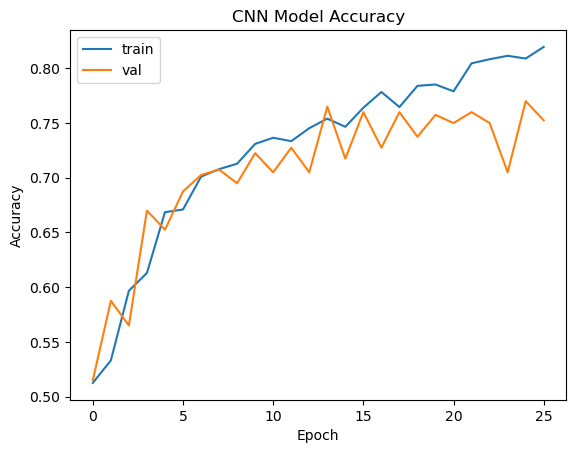

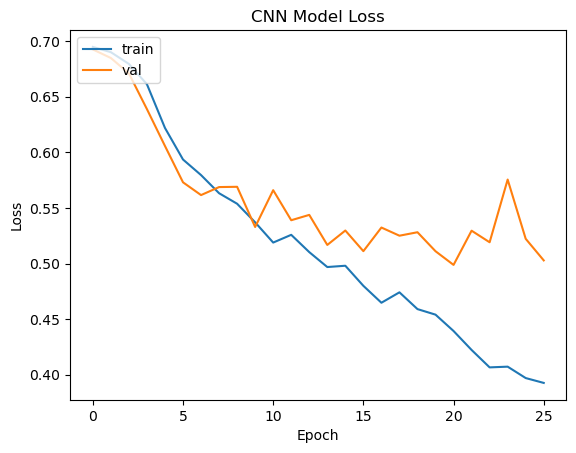

In [787]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## FNN Architecture

In [791]:
model_fnn = keras.Sequential()

model_fnn.add(Flatten(input_shape=(200, 200, 3))),
model_fnn.add(Dense(256, activation='relu')),
model_fnn.add(Dense(128, activation='relu')),
model_fnn.add(Dropout(0.2)),
model_fnn.add(Dense(1, activation='sigmoid'))

In [792]:
model_fnn.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_59 (Flatten)        (None, 120000)            0         
                                                                 
 dense_151 (Dense)           (None, 256)               30720256  
                                                                 
 dense_152 (Dense)           (None, 128)               32896     
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_153 (Dense)           (None, 1)                 129       
                                                                 
Total params: 30753281 (117.31 MB)
Trainable params: 30753281 (117.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [793]:
print("Number of layers in the base model: ", len(model_fnn.layers))

Number of layers in the base model:  5


In [794]:
model_fnn.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [766]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode="auto", baseline=None, restore_best_weights=True)
checkpoint_fnn = keras.callbacks.ModelCheckpoint("fnn_best_model.h5", save_best_only=True)
history_fnn = model_cnn.fit(train_generator, epochs=20, validation_data=validation_generator, verbose=1, callbacks=[early_stop,checkpoint_fnn])

Epoch 1/20
161/161 [==============================] - 43s 267ms/step - loss: 0.3346 - accuracy: 0.8508 - val_loss: 0.5252 - val_accuracy: 0.7725
Epoch 2/20
161/161 [==============================] - 42s 261ms/step - loss: 0.3247 - accuracy: 0.8683 - val_loss: 0.4907 - val_accuracy: 0.7650
Epoch 3/20
161/161 [==============================] - 41s 257ms/step - loss: 0.3057 - accuracy: 0.8670 - val_loss: 0.5717 - val_accuracy: 0.7400
Epoch 4/20
161/161 [==============================] - 41s 255ms/step - loss: 0.3186 - accuracy: 0.8546 - val_loss: 0.5300 - val_accuracy: 0.7675
Epoch 5/20
161/161 [==============================] - 43s 266ms/step - loss: 0.3137 - accuracy: 0.8571 - val_loss: 0.5352 - val_accuracy: 0.7625
Epoch 6/20
161/161 [==============================] - 42s 258ms/step - loss: 0.2982 - accuracy: 0.8720 - val_loss: 0.5580 - val_accuracy: 0.7550
Epoch 7/20
161/161 [==============================] - 42s 261ms/step - loss: 0.2934 - accuracy: 0.8708 - val_loss: 0.8197 - val_ac

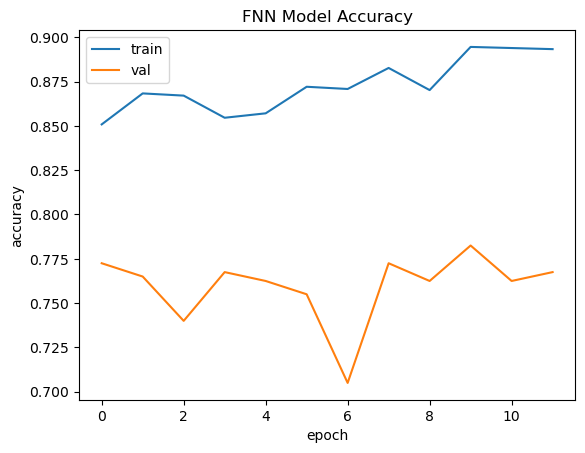

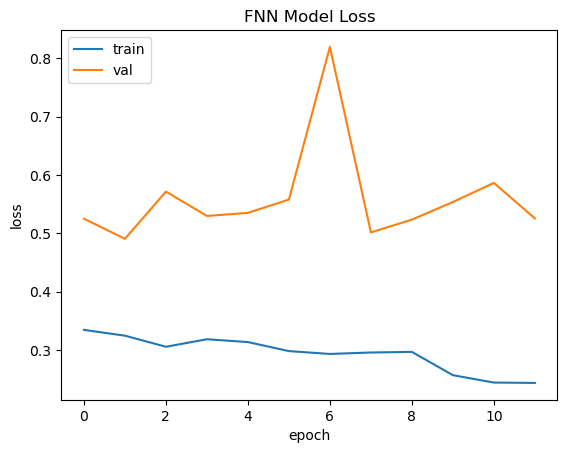

In [767]:
plt.plot(history_fnn.history['accuracy'])
plt.plot(history_fnn.history['val_accuracy'])
plt.title('FNN Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_fnn.history['loss'])
plt.plot(history_fnn.history['val_loss'])
plt.title('FNN Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evalution Report for CNN & FNN

In [771]:
loss,acc = model_cnn.evaluate(test_generator, batch_size = 64, verbose = 0)

print('The accuracy of the model for testing data:',acc*100)
print('The Loss of the model for testing data:',loss)

The accuracy of the model for testing data: 75.74999928474426
The Loss of the model for testing data: 0.5987656116485596


In [768]:
loss,acc = model_fnn.evaluate(test_generator, batch_size = 64, verbose = 0)

print('The accuracy of the model for testing data:',acc*100)
print('The Loss of the model for testing data:',loss)

The accuracy of the model for testing data: 49.000000953674316
The Loss of the model for testing data: 0.7028699517250061


### Confusion Matrix of CNN

In [802]:
predicted_labels = model_cnn.predict(test_generator)
predicted_labels = (predicted_labels > 0.5)

40/40 [==============================] - 2s 44ms/step


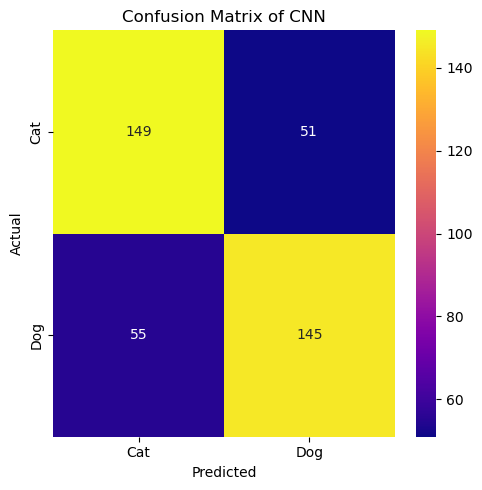

In [807]:
predicted_labels = np.array(predicted_labels)
true_labels = np.array(test_generator.labels)

confusion = confusion_matrix(true_labels, predicted_labels)
class_names = ['Cat','Dog']
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='plasma', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix of CNN")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Confusion Matrix of FNN

In [804]:
predicted_labels1 = model_fnn.predict(test_generator)
predicted_labels1 = (predicted_labels1 > 0.5)

40/40 [==============================] - 1s 28ms/step


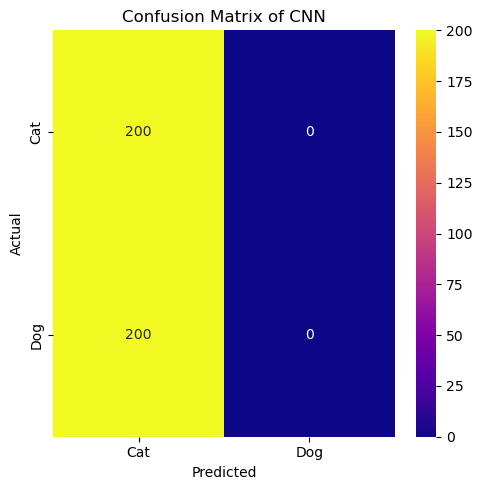

In [808]:
predicted_labels1 = np.array(predicted_labels1)
true_labels = np.array(test_generator.labels)

confusion = confusion_matrix(true_labels, predicted_labels1)
class_names = ['Cat','Dog']
plt.figure(figsize=(5,5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='plasma', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix of CNN")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Classification Report

In [801]:
#CNN
print(classification_report(true_labels, predicted_labels, target_names=['cat','dog']))

              precision    recall  f1-score   support

         cat       0.73      0.74      0.74       200
         dog       0.74      0.72      0.73       200

    accuracy                           0.73       400
   macro avg       0.74      0.73      0.73       400
weighted avg       0.74      0.73      0.73       400



In [806]:
#FNN
print(classification_report(true_labels, predicted_labels1, target_names=['cat','dog']))

              precision    recall  f1-score   support

         cat       0.50      1.00      0.67       200
         dog       0.00      0.00      0.00       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400

